In [10]:
import glob
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# 환경설정
pd.set_option('display.max_columns', None)
files = glob.glob('./data/big_transaction_address_transaction/*')
columns_list = ['transaction_hash', 'block_timestamp', 'send_count', 'receive_count', 'send_value', 'receive_value', 'send_address', 'send_amount', 'receive_address', 'receive_amount']
new_columns_list = ['transaction_hash', 'block_timestamp', 'send_count', 'receive_count', 'send_value', 'receive_value', 'send_address', 'send_amount', 'receive_address', 'receive_amount', 'block_timestamp_date']

# 1 BTC = 1억 사토시
satoshi = 100000000

In [5]:
### 지갑주소 불러오기
with open("./data/event_day_transaction/receive_address_2_day_over_136_result.pkl", "rb") as f:
    receive_address_result = pickle.load(f)

print(receive_address_result)


receive_address_df = pd.read_csv('./data/big_transaction_address/big_transaction_address_10000.csv', header=None).T.values[0]
receive_address_df

['3LMnJjz1RJjNZ1uFNhBvcwQdEp5T2rnFg9', '31qneokFGwpEkoZRksjymxZAiTEmAim3Ab', '3FxNPjJmcQsw5czeheoLMub7sveWW1BNFK', '32XUXaJftyDXMqkQt81GJmwCP513SohC1W', '35Sr8veMauPrkLBZRJTHJH333QF5UfyTpW', '3GpGgT3sFxcBtt6JZRG3Kn7N4JfmsszXy6', '3D9Gi4JsBaFRfyyDHiC3QM4o3zreV6oD4G', '372QHtyJvHaTyqWUdKSTYoMydwkhDc79FR', '1Kr6QSydW9bFQG1mXiPNNu6WpJGmUa9i1g', '3NPzLv1Jy4vhCgavfz6Zt7injzaHMUuJYk', '34UQSm2tUn7pnxAJiv7f4M6mjk51nhfeGA', '3BTN4ZPKZnGJEGSVe9zPe4bTn8Qh39jkbd', '3Eab4nDg6WJ5WR1uvWQirtMzWaA34RQk9s', '3FhWzKn8yU4s1ZTWm4kyHVS59GVKsVncCr', '32qpvpX9DuefqGFmw9h6MJS95fgAP4w2gq', '3QQKRwuVyRgv7xZVN9aR1z8p7SUFukAsCz', '3Mek9CUGo99byMrLKCfMSakCUF6hqR3vTU', '32jPMzNzHKE2f6u6V1Ch9qxXXf456D83F5', '3NHB7u25szhW9vz3ikeBbDN8RGE5LC3VSR', '3EP4xyWmB8u6ZDmMQHFv1oYPEETUjwMrQV', '35NGMkxEZrhBp2awh7RCfFYFsXhREFReJC', '3HCufpyqXEtHjbdMU9RMWBXzupr4VRUPMR', '3BuQmbmdce3e31GEovq5SgowLdfMgJzLDE', '3AckDd1ot9rSiRUCfazd7yufVbCorerWjV', '3EYyfuqH7zMPUJYymbNsLjYBG2pxGjgjDe', '17A16QmavnUfCW11DAApiJxp7ARnxN5pGX', '35mwqShnSt

array(['1EmzTWexCvDKzXU1RFHfW1p2WS1nm4aTHT',
       'bc1qzucd7xvf2ywvvc56ycfheh9fydvayujgldthsd',
       '3MBHui4rCiFS8sVFaaLS7GvUio4t7JeeGj', ...,
       '193Z6JLAqHhHqfpv8AfEDDSHggzjBZwe5B',
       '3BMEXN5vL6bjdCkz1zJyoVEQE8cfcTauTA',
       '1P2S932webLgnDeYGTHoaHnc7pgz1T7kmz'], dtype=object)

In [5]:
normal_df = pd.read_csv('./data/active_wallet/big_transaction_active_wallet.csv')
normal_df

,Unnamed: 0,transaction_wallet_list,transaction_wallet_count,active_wallet_list,active_wallet_count
0,2015-01-01,"{'17BymcHaGRbXGnEzR2m9woUYNf9FBPPJ2P', '1AG1M4...",90,"{'1KwA4fS4uVuCNjCtMivE7m5ATbv93UZg8V', '17Bymc...",90
1,2015-01-02,"{'17BymcHaGRbXGnEzR2m9woUYNf9FBPPJ2P', '1LY8CQ...",79,"{'17BymcHaGRbXGnEzR2m9woUYNf9FBPPJ2P', '1LY8CQ...",130
2,2015-01-03,"{'17BymcHaGRbXGnEzR2m9woUYNf9FBPPJ2P', '1AG1M4...",119,"{'17BymcHaGRbXGnEzR2m9woUYNf9FBPPJ2P', '1LY8CQ...",175
3,2015-01-04,"{'17BymcHaGRbXGnEzR2m9woUYNf9FBPPJ2P', '1AG1M4...",116,"{'17BymcHaGRbXGnEzR2m9woUYNf9FBPPJ2P', '1LY8CQ...",200
4,2015-01-05,"{'14mhJHmj25kAiBDpUd3hord9Wm694CxEDn', '17Bymc...",121,"{'1LY8CQ9GaxymEoMWhAxdKw5yQypXpNru65', '1GUyd5...",223
...,...,...,...,...,...
3657,2025-01-05,"{'1AKi5vkajkV7r6wojJfzzPQMBsa8AgwVCZ', '1BhQPM...",214,"{'bc1q2vmrplqe6rh98fdwweduh8hur9ek88zcl9g5r7',...",8348
3658,2025-01-06,"{'bc1qaksp5ur0ga2ngy0vrq358adqgj45tmww63vcul',...",247,"{'bc1q2vmrplqe6rh98fdwweduh8hur9ek88zcl9g5r7',...",8333
3659,2025-01-07,"{'1C9EvG9fv5vSSFwh2QW4dnWuSLyDm5kuME', '1BhQPM...",273,"{'bc1q2vmrplqe6rh98fdwweduh8hur9ek88zcl9g5r7',...",8329
3660,2025-01-08,"{'1C9EvG9fv5vSSFwh2QW4dnWuSLyDm5kuME', '1BhQPM...",250,"{'bc1q2vmrplqe6rh98fdwweduh8hur9ek88zcl9g5r7',...",8305


In [6]:
normal_df

,Unnamed: 0,transaction_wallet_list,transaction_wallet_count,active_wallet_list,active_wallet_count
0,2015-01-01,"{'17BymcHaGRbXGnEzR2m9woUYNf9FBPPJ2P', '1AG1M4...",90,"{'1KwA4fS4uVuCNjCtMivE7m5ATbv93UZg8V', '17Bymc...",90
1,2015-01-02,"{'17BymcHaGRbXGnEzR2m9woUYNf9FBPPJ2P', '1LY8CQ...",79,"{'17BymcHaGRbXGnEzR2m9woUYNf9FBPPJ2P', '1LY8CQ...",130
2,2015-01-03,"{'17BymcHaGRbXGnEzR2m9woUYNf9FBPPJ2P', '1AG1M4...",119,"{'17BymcHaGRbXGnEzR2m9woUYNf9FBPPJ2P', '1LY8CQ...",175
3,2015-01-04,"{'17BymcHaGRbXGnEzR2m9woUYNf9FBPPJ2P', '1AG1M4...",116,"{'17BymcHaGRbXGnEzR2m9woUYNf9FBPPJ2P', '1LY8CQ...",200
4,2015-01-05,"{'14mhJHmj25kAiBDpUd3hord9Wm694CxEDn', '17Bymc...",121,"{'1LY8CQ9GaxymEoMWhAxdKw5yQypXpNru65', '1GUyd5...",223
...,...,...,...,...,...
3657,2025-01-05,"{'1AKi5vkajkV7r6wojJfzzPQMBsa8AgwVCZ', '1BhQPM...",214,"{'bc1q2vmrplqe6rh98fdwweduh8hur9ek88zcl9g5r7',...",8348
3658,2025-01-06,"{'bc1qaksp5ur0ga2ngy0vrq358adqgj45tmww63vcul',...",247,"{'bc1q2vmrplqe6rh98fdwweduh8hur9ek88zcl9g5r7',...",8333
3659,2025-01-07,"{'1C9EvG9fv5vSSFwh2QW4dnWuSLyDm5kuME', '1BhQPM...",273,"{'bc1q2vmrplqe6rh98fdwweduh8hur9ek88zcl9g5r7',...",8329
3660,2025-01-08,"{'1C9EvG9fv5vSSFwh2QW4dnWuSLyDm5kuME', '1BhQPM...",250,"{'bc1q2vmrplqe6rh98fdwweduh8hur9ek88zcl9g5r7',...",8305


In [7]:
normal_df.columns = ['date', 'transaction_wallet_list', 'transaction_wallet_count', 'active_wallet_list', 'active_wallet_count']
normal_df = normal_df.set_index('date')
normal_df

,transaction_wallet_list,transaction_wallet_count,active_wallet_list,active_wallet_count
date,,,,
2015-01-01,"{'17BymcHaGRbXGnEzR2m9woUYNf9FBPPJ2P', '1AG1M4...",90,"{'1KwA4fS4uVuCNjCtMivE7m5ATbv93UZg8V', '17Bymc...",90
2015-01-02,"{'17BymcHaGRbXGnEzR2m9woUYNf9FBPPJ2P', '1LY8CQ...",79,"{'17BymcHaGRbXGnEzR2m9woUYNf9FBPPJ2P', '1LY8CQ...",130
2015-01-03,"{'17BymcHaGRbXGnEzR2m9woUYNf9FBPPJ2P', '1AG1M4...",119,"{'17BymcHaGRbXGnEzR2m9woUYNf9FBPPJ2P', '1LY8CQ...",175
2015-01-04,"{'17BymcHaGRbXGnEzR2m9woUYNf9FBPPJ2P', '1AG1M4...",116,"{'17BymcHaGRbXGnEzR2m9woUYNf9FBPPJ2P', '1LY8CQ...",200
2015-01-05,"{'14mhJHmj25kAiBDpUd3hord9Wm694CxEDn', '17Bymc...",121,"{'1LY8CQ9GaxymEoMWhAxdKw5yQypXpNru65', '1GUyd5...",223
...,...,...,...,...
2025-01-05,"{'1AKi5vkajkV7r6wojJfzzPQMBsa8AgwVCZ', '1BhQPM...",214,"{'bc1q2vmrplqe6rh98fdwweduh8hur9ek88zcl9g5r7',...",8348
2025-01-06,"{'bc1qaksp5ur0ga2ngy0vrq358adqgj45tmww63vcul',...",247,"{'bc1q2vmrplqe6rh98fdwweduh8hur9ek88zcl9g5r7',...",8333
2025-01-07,"{'1C9EvG9fv5vSSFwh2QW4dnWuSLyDm5kuME', '1BhQPM...",273,"{'bc1q2vmrplqe6rh98fdwweduh8hur9ek88zcl9g5r7',...",8329


In [8]:
normal_df.to_csv('./data/active_wallet/big_transaction_active_wallet.csv', index=True)

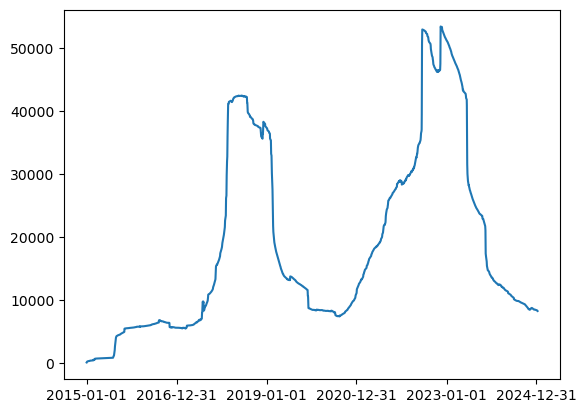

In [11]:
active_wallet_df = normal_df['active_wallet_count']

plt.plot(active_wallet_df)

# X축 날짜 포맷 자동 조정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.show()


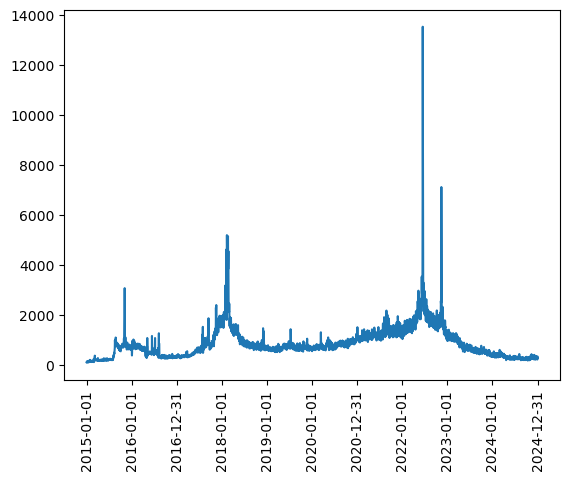

In [19]:
active_wallet_df = normal_df['transaction_wallet_count']

start = '2015-01-01'
end = '2024-12-31'

active_wallet_df = active_wallet_df[(active_wallet_df.index>=start)&(active_wallet_df.index<=end)]

plt.plot(active_wallet_df)

# X축 날짜 포맷 자동 조정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xticks(rotation=90)
plt.show()


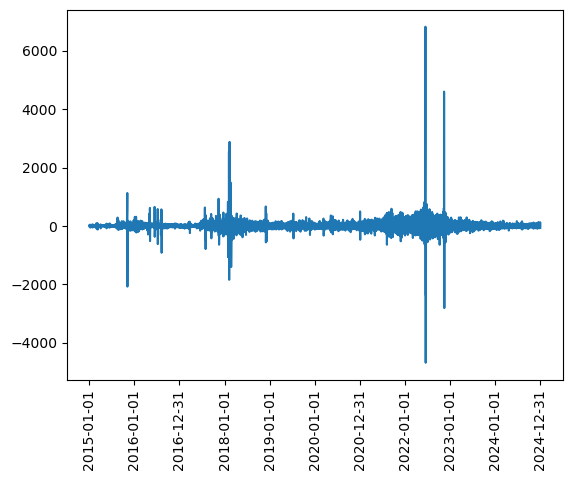

In [22]:
active_wallet_df = normal_df['transaction_wallet_count']

start = '2015-01-01'
end = '2024-12-31'

active_wallet_df = active_wallet_df[(active_wallet_df.index>=start)&(active_wallet_df.index<=end)]
active_wallet_df['transaction_wallet_delta'] = active_wallet_df.diff()

plt.plot(active_wallet_df['transaction_wallet_delta'])

# X축 날짜 포맷 자동 조정
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xticks(rotation=90)
plt.show()
